In [23]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [2]:
alucar = pd.read_csv('datasets/alucar.csv')

print("Quantidade de Linhas:", alucar.shape[0] )
print("Quantidade de Colunas:", alucar.shape[1] )
print("Quantidade de dados nulos:", alucar.isna().sum().sum() )

Quantidade de Linhas: 24
Quantidade de Colunas: 2
Quantidade de dados nulos: 0


In [3]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x=x, y=y, data = dataset)
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc = 'left', fontsize = 14)
    ax.set_xlabel(labelx, fontsize = 12)
    ax.set_ylabel(labely, fontsize = 12)
    ax = ax

def comparacao(x, y1, y2, y3,dataset, titulo):
    plt.figure(figsize= (16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x=x, y=y1, data = dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data = dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data = dataset)
    ax = ax

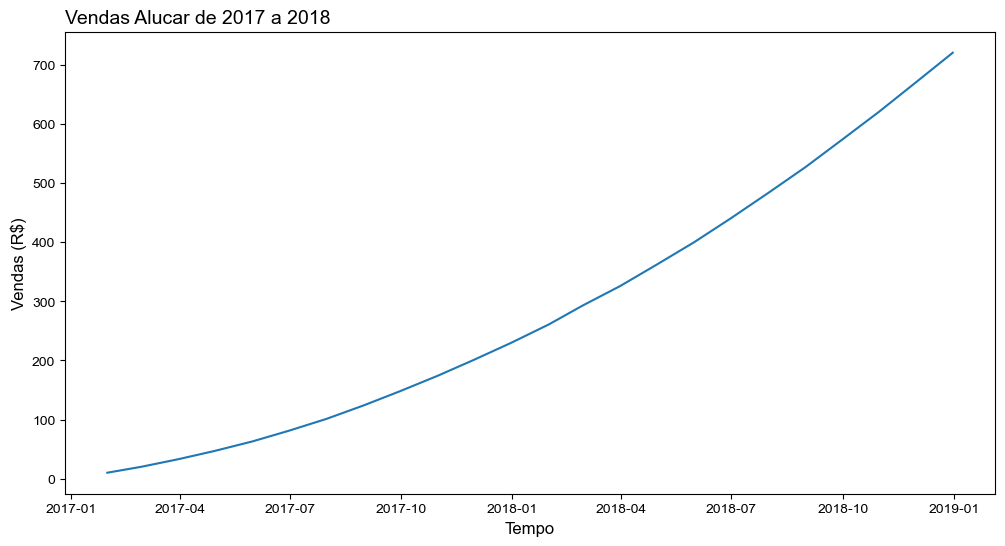

In [4]:
## https://urbaninstitute.github.io/graphics-styleguide/
plotar("Vendas Alucar de 2017 a 2018", "Tempo", "Vendas (R$)","mes","vendas",alucar)

In [7]:
alucar['aumento'] = alucar['vendas'].diff()
alucar['aceleração'] = alucar['vendas'].diff().diff()

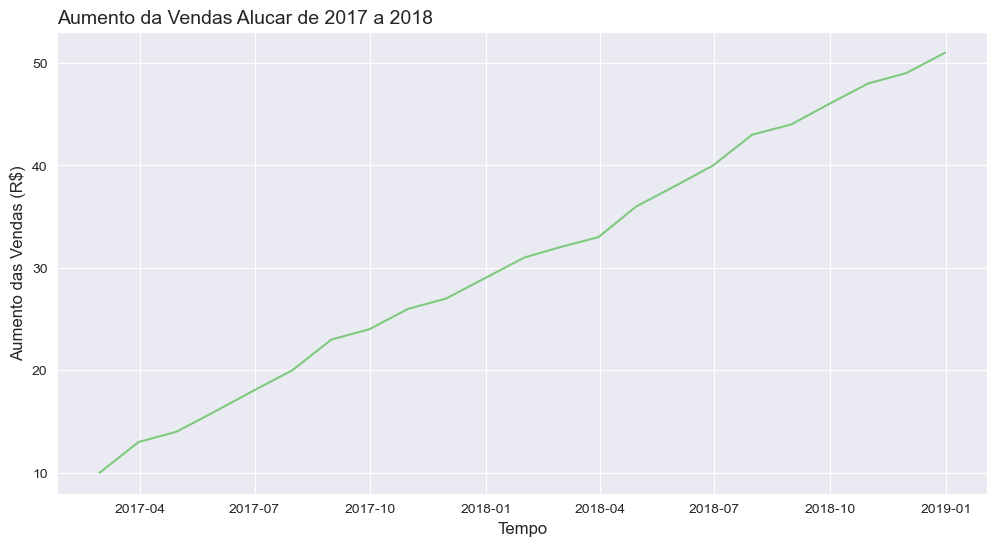

In [8]:
plotar("Aumento da Vendas Alucar de 2017 a 2018","Tempo","Aumento das Vendas (R$)","mes","aumento",alucar)

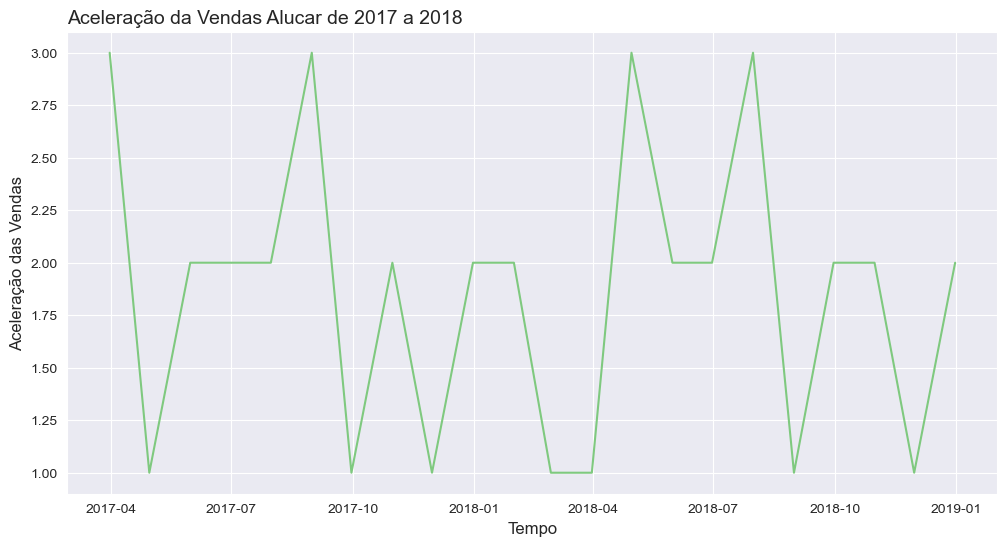

In [9]:
plotar("Aceleração da Vendas Alucar de 2017 a 2018","Tempo","Aceleração das Vendas","mes","aceleração",alucar)

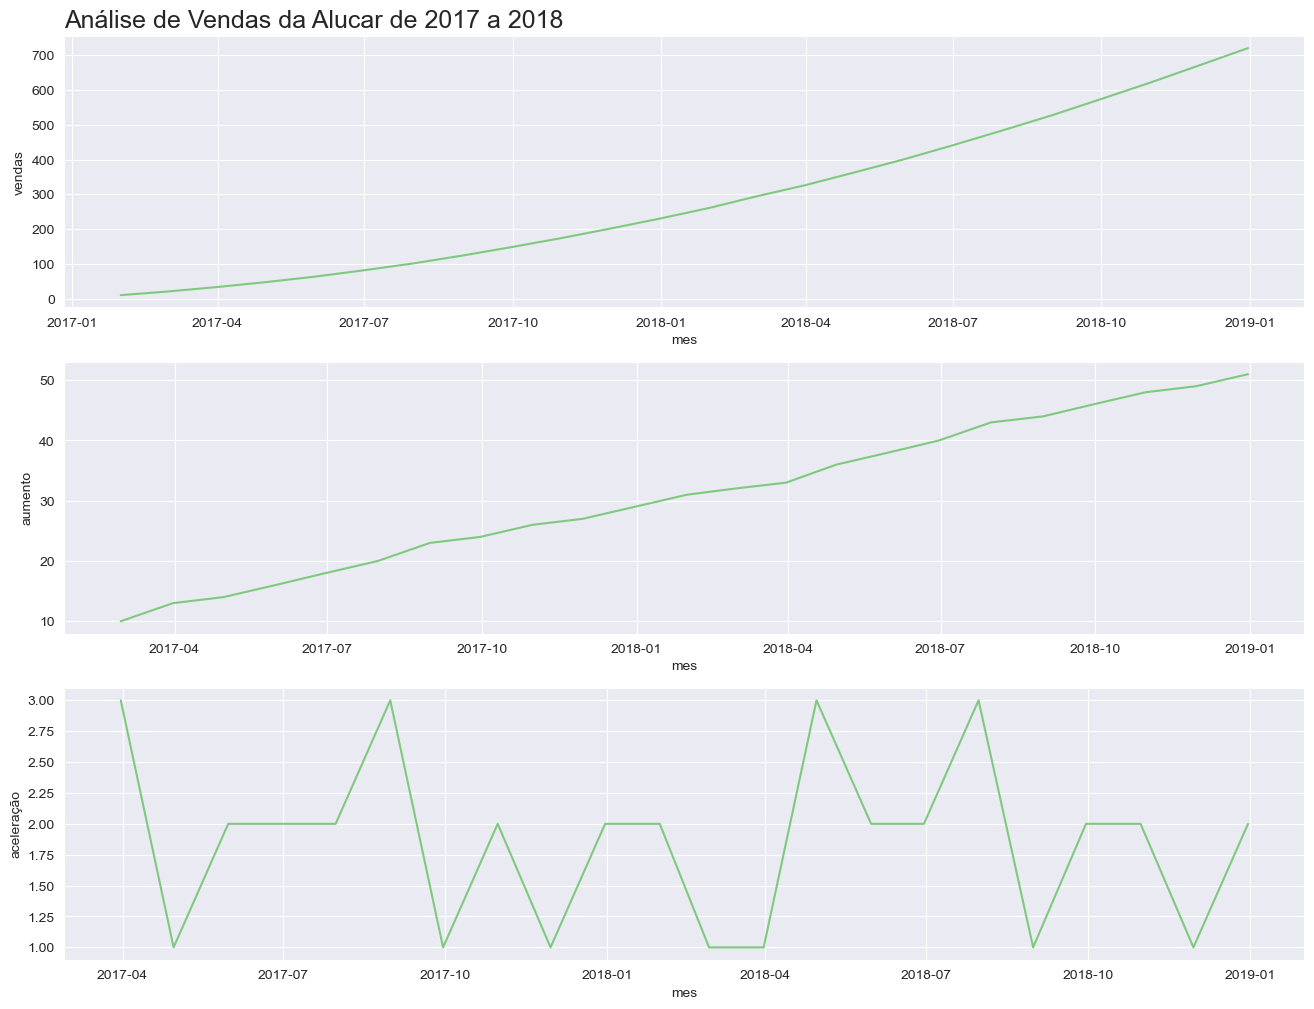

In [10]:
comparacao("mes","vendas","aumento","aceleração",alucar,"Análise de Vendas da Alucar de 2017 a 2018")

# Tendencia de aumento das vendas
# O Aumento mês a mês está crecendo
# A aceleração do aumento é sempre positiva

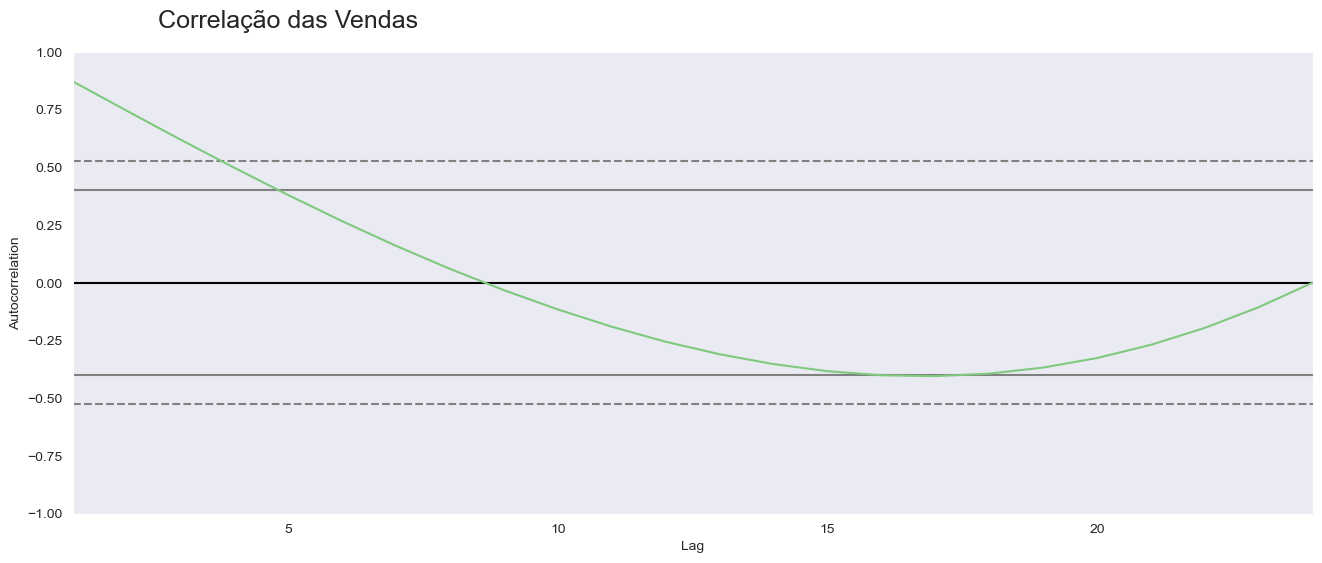

In [8]:
ax = plt.figure(figsize= (16,6))
ax.suptitle("Correlação das Vendas", fontsize = 18, x =0.26, y =0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

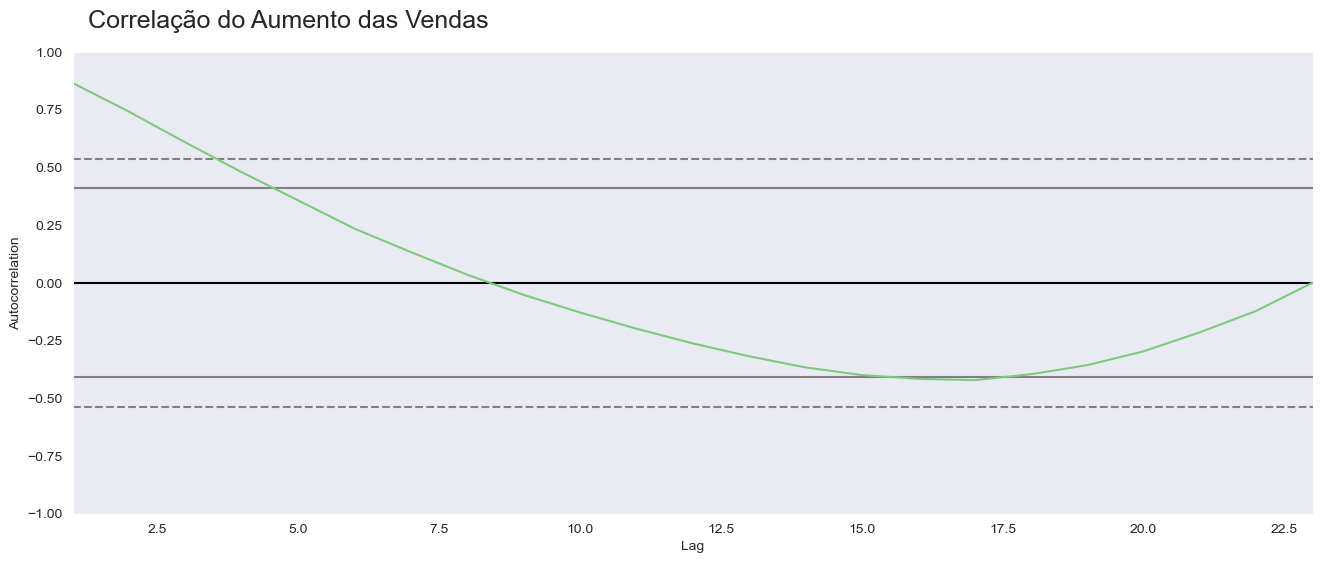

In [11]:
ax = plt.figure(figsize= (16,6))
ax.suptitle("Correlação do Aumento das Vendas", fontsize = 18, x =0.26, y =0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

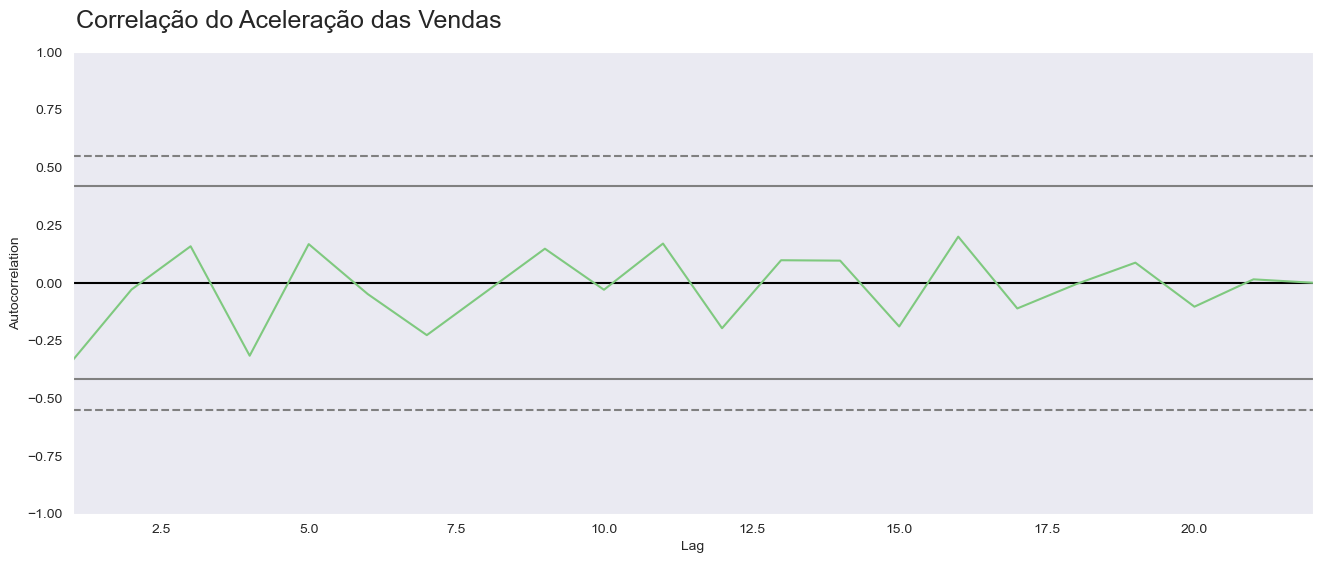

In [12]:
ax = plt.figure(figsize= (16,6))
ax.suptitle("Correlação do Aceleração das Vendas", fontsize = 18, x =0.26, y =0.95)
autocorrelation_plot(alucar['aceleração'][2:])
ax = ax

In [13]:
assinantes = pd.read_csv('datasets/newsletter_alucar.csv')

print("Quantidade de Linhas:", assinantes.shape[0] )
print("Quantidade de Colunas:", assinantes.shape[1] )
print("Quantidade de dados nulos:", assinantes.isna().sum().sum() )

assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

Quantidade de Linhas: 24
Quantidade de Colunas: 2
Quantidade de dados nulos: 0


mes           datetime64[ns]
assinantes             int64
dtype: object

In [14]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleração'] = assinantes['assinantes'].diff().diff()

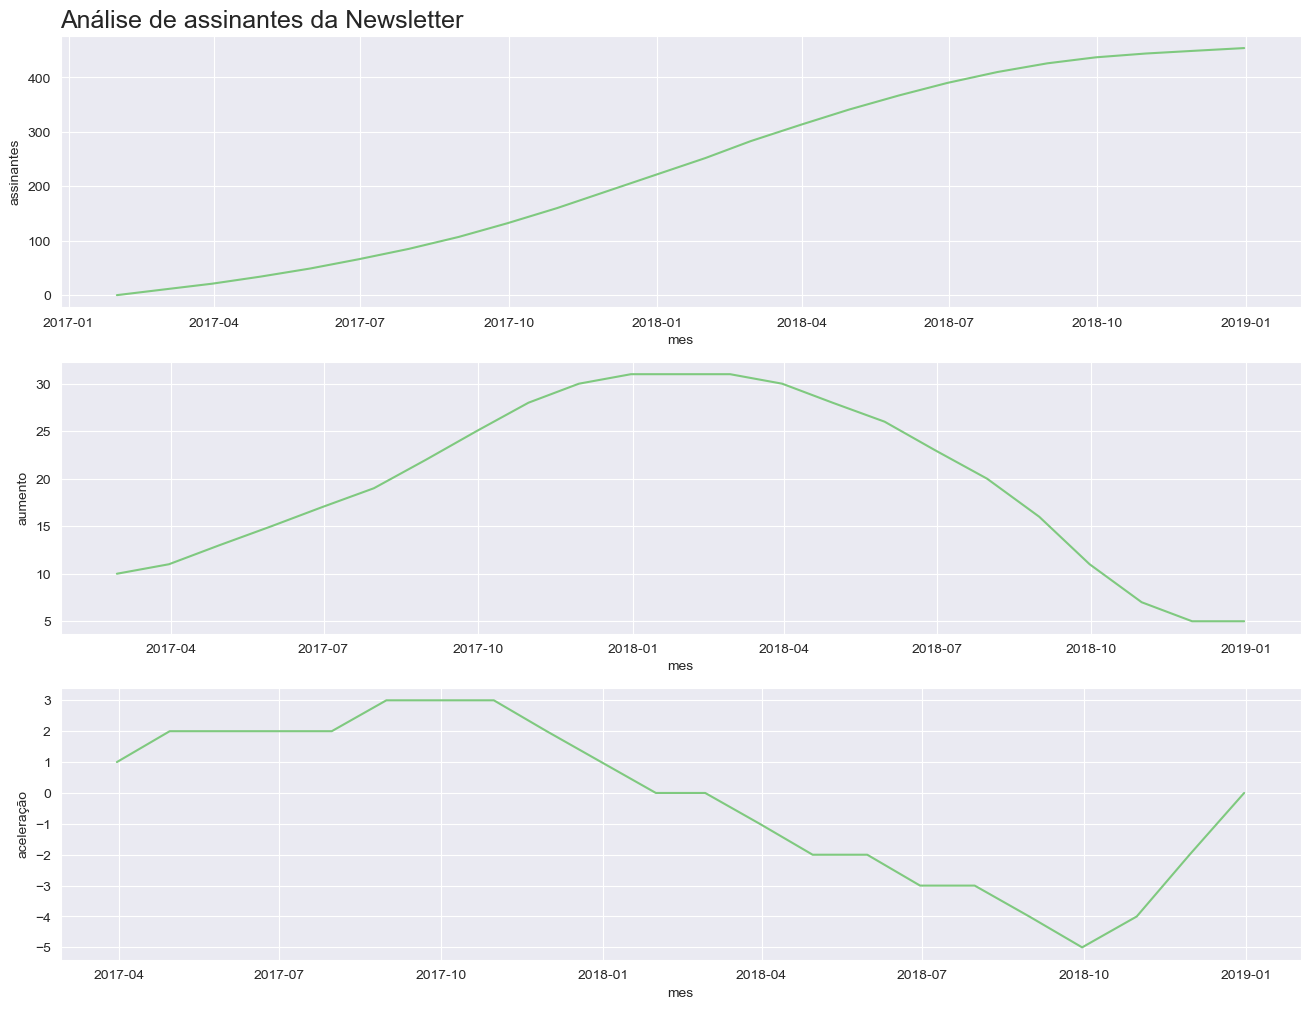

In [15]:
comparacao('mes','assinantes','aumento','aceleração',assinantes,'Análise de assinantes da Newsletter')

In [16]:
chocolate = pd.read_csv('datasets/chocolura.csv')

print("Quantidade de Linhas:", chocolate.shape[0] )
print("Quantidade de Colunas:", chocolate.shape[1] )
print("Quantidade de dados nulos:", chocolate.isna().sum().sum() )

chocolate['mes'] = pd.to_datetime(chocolate['mes'])
chocolate.dtypes

Quantidade de Linhas: 24
Quantidade de Colunas: 2
Quantidade de dados nulos: 0


mes       datetime64[ns]
vendas             int64
dtype: object

In [17]:
chocolate['aumento'] = chocolate['vendas'].diff()
chocolate['aceleração'] = chocolate['vendas'].diff().diff()

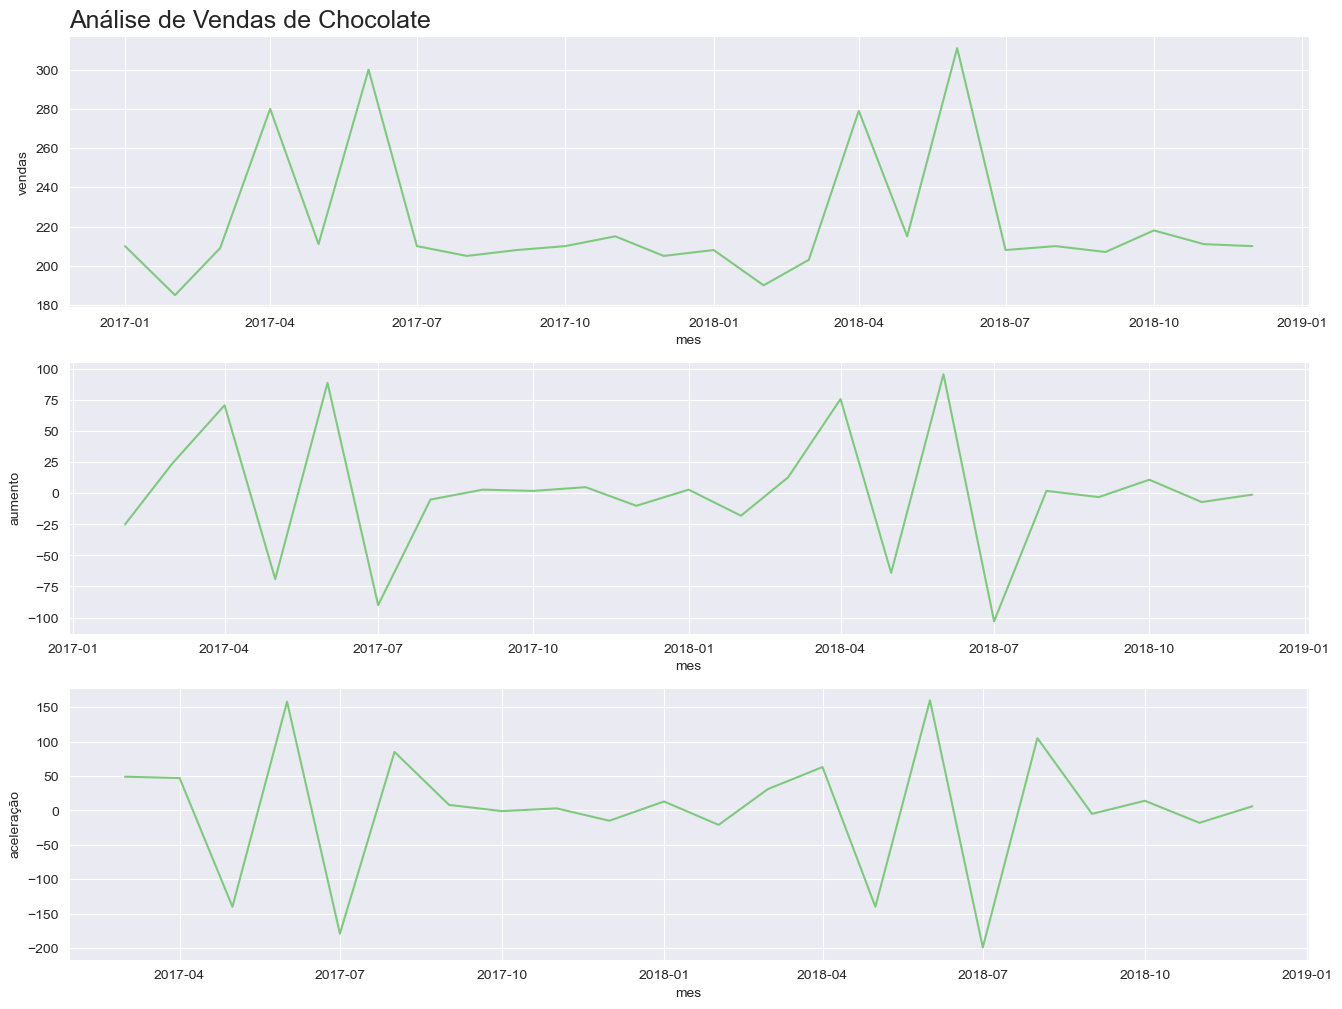

In [18]:
comparacao('mes','vendas','aumento','aceleração', chocolate, 'Análise de Vendas de Chocolate')

# Existe um padrão repetitivo dentro de um mesmo determinado periodo de tempo, no caso do mês 4 ao mês 6, há indícios de sazonalidade. 
# Época da Páscoa e dia dos Namorados.

In [19]:
# Vendas diárias Outubro e Novembro

Vendas_dia =  pd.read_csv('datasets/vendas_por_dia.csv')

print("Quantidade de Linhas:", Vendas_dia.shape[0] )
print("Quantidade de Colunas:", Vendas_dia.shape[1] )
print("Quantidade de dados nulos:", Vendas_dia.isna().sum().sum() )

Vendas_dia['dia'] = pd.to_datetime(Vendas_dia['dia'])
Vendas_dia.dtypes

Quantidade de Linhas: 61
Quantidade de Colunas: 2
Quantidade de dados nulos: 0


dia       datetime64[ns]
vendas             int64
dtype: object

In [20]:
Vendas_dia['aumento'] = Vendas_dia['vendas'].diff()
Vendas_dia['aceleração'] = Vendas_dia['vendas'].diff().diff()

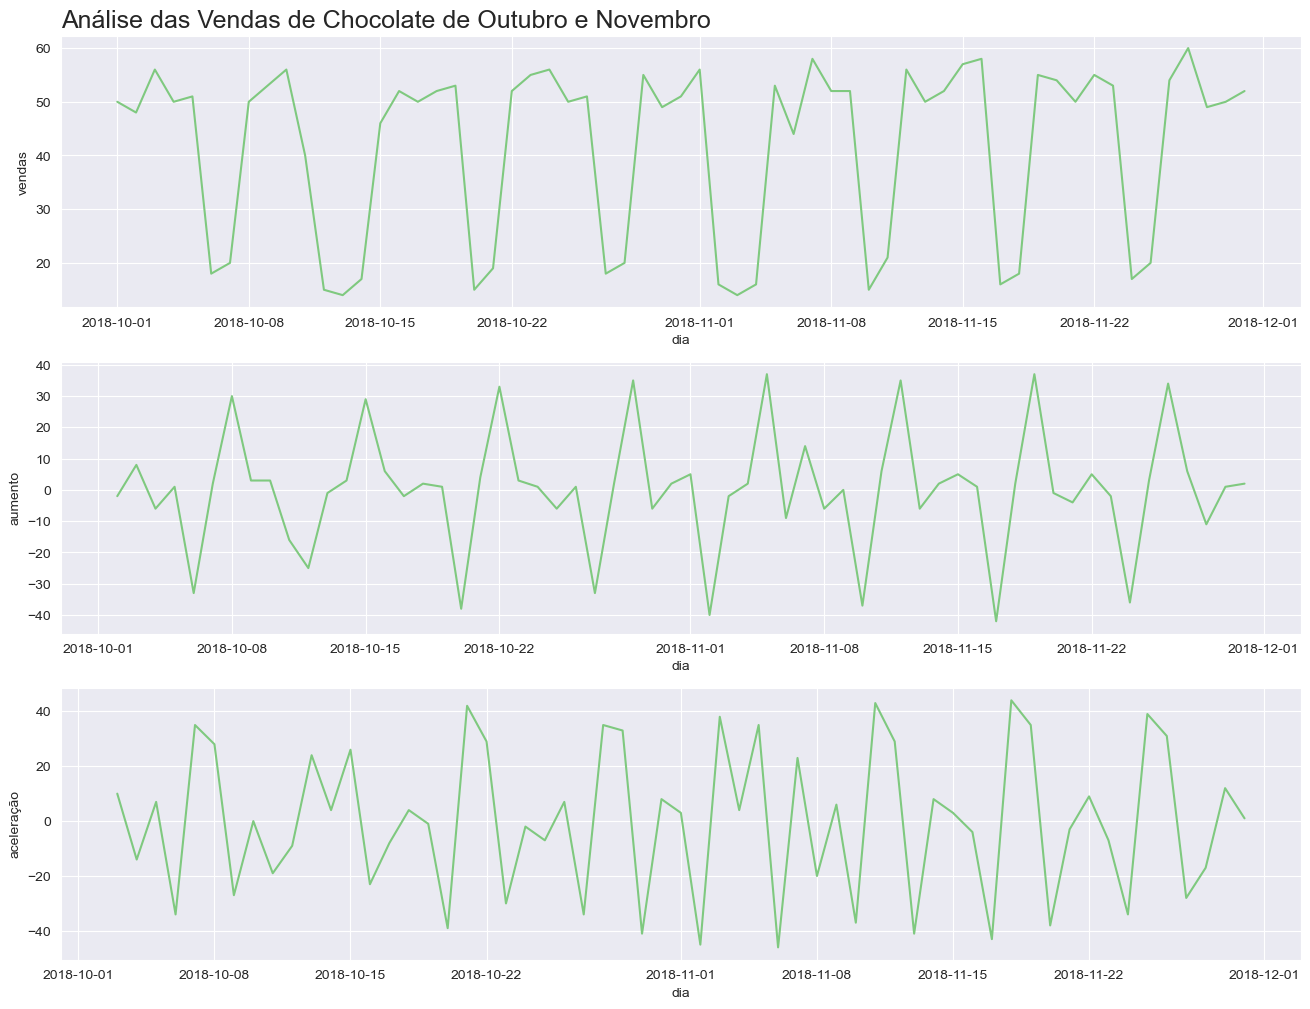

In [21]:
comparacao('dia','vendas','aumento','aceleração',Vendas_dia, 'Análise das Vendas de Chocolate de Outubro e Novembro')

In [24]:
# Analisando a Sazonalidade
from datetime import datetime as dt

dic = {'Monday':'Segunda', 'Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado','Sunday':'Domingo'}

Vendas_dia['dia_da_semana'] = Vendas_dia['dia'].dt.day_name().map(dic)

vendas_agrupadas = Vendas_dia.groupby('dia_da_semana')['vendas','aumento','aceleração'].mean().round()
vendas_agrupadas

,vendas,aumento,aceleração
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


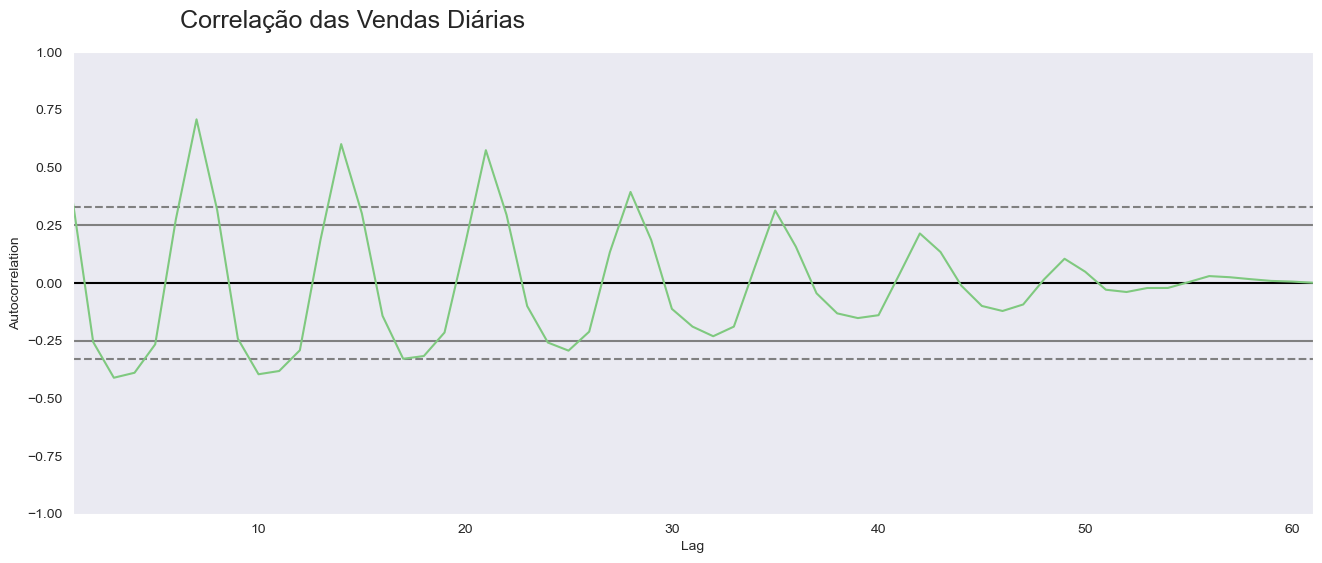

In [22]:
#Correlação das Vendas Diárias
ax = plt.figure(figsize= (16,6))
ax.suptitle("Correlação das Vendas Diárias", fontsize = 18, x =0.3, y =0.95)
autocorrelation_plot(Vendas_dia['vendas'])
ax = ax

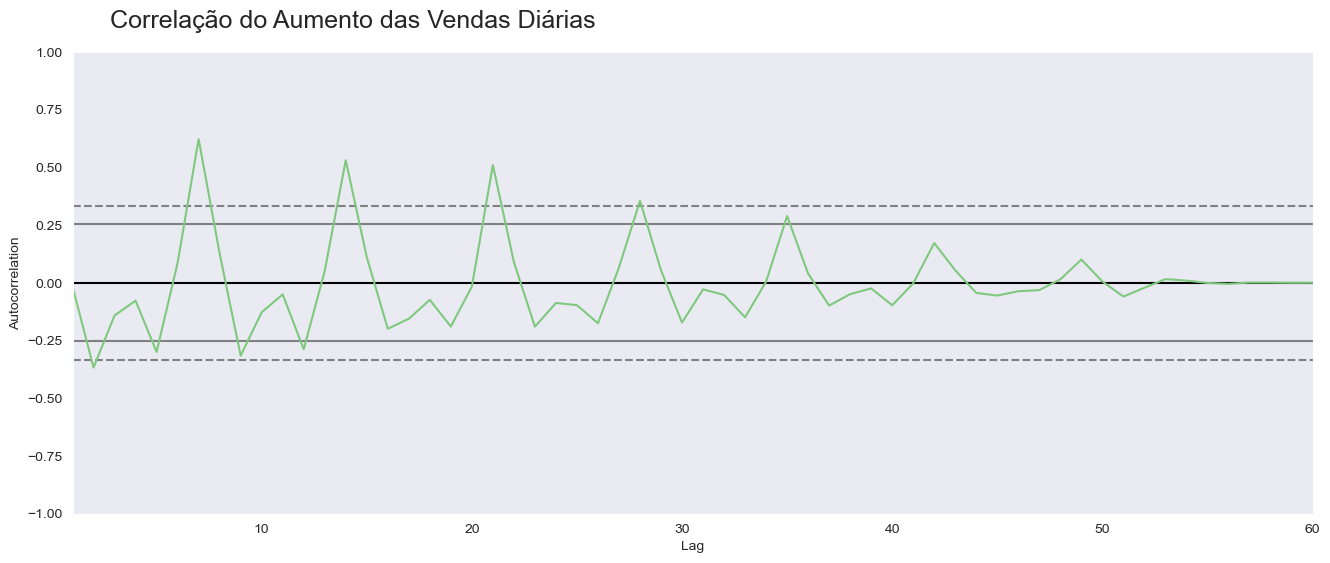

In [23]:
#Correlação do aumento das Vendas Diárias
ax = plt.figure(figsize= (16,6))
ax.suptitle("Correlação do Aumento das Vendas Diárias", fontsize = 18, x =0.3, y =0.95)
autocorrelation_plot(Vendas_dia['aumento'][1:])
ax = ax

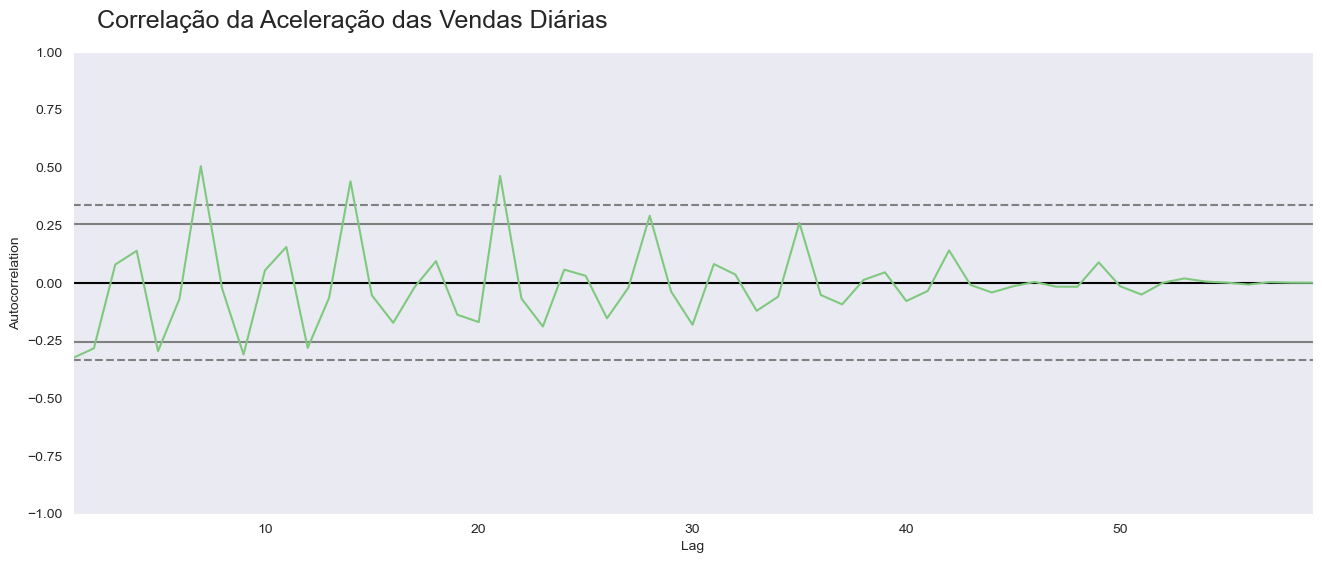

In [24]:
#Correlação da Aceleração das Vendas Diárias
ax = plt.figure(figsize= (16,6))
ax.suptitle("Correlação da Aceleração das Vendas Diárias", fontsize = 18, x =0.3, y =0.95)
autocorrelation_plot(Vendas_dia['aceleração'][2:])
ax = ax

In [26]:
# Analise de Vendas
# Vendas diárias Outubro e Novembro

cafelura =  pd.read_csv('datasets/cafelura.csv')

print("Quantidade de Linhas:", cafelura.shape[0] )
print("Quantidade de Colunas:", cafelura.shape[1] )
print("Quantidade de dados nulos:", cafelura.isna().sum().sum() )

cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

Quantidade de Linhas: 24
Quantidade de Colunas: 2
Quantidade de dados nulos: 0


mes       datetime64[ns]
vendas             int64
dtype: object

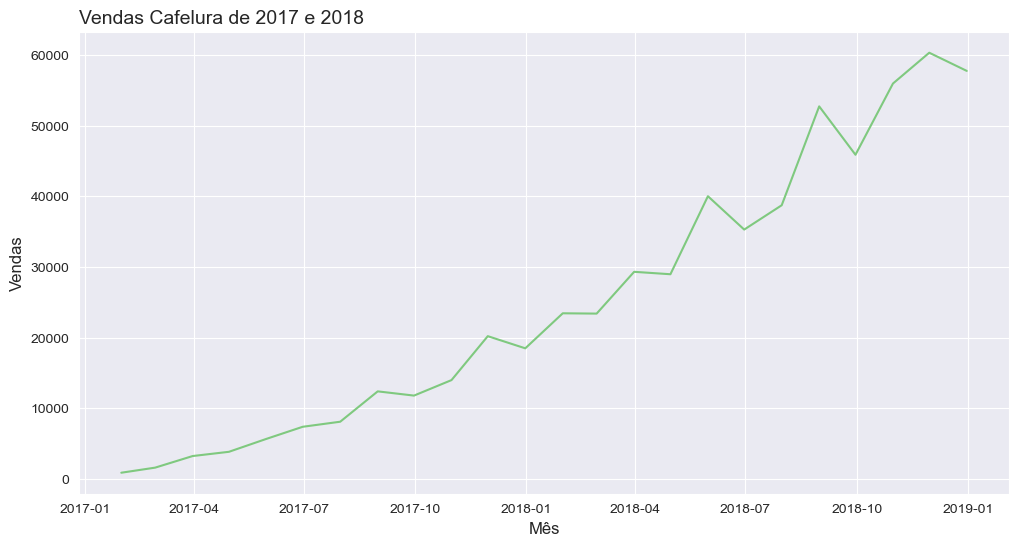

In [28]:
plotar('Vendas Cafelura de 2017 e 2018', 'Mês', 'Vendas', 'mes', 'vendas', cafelura)

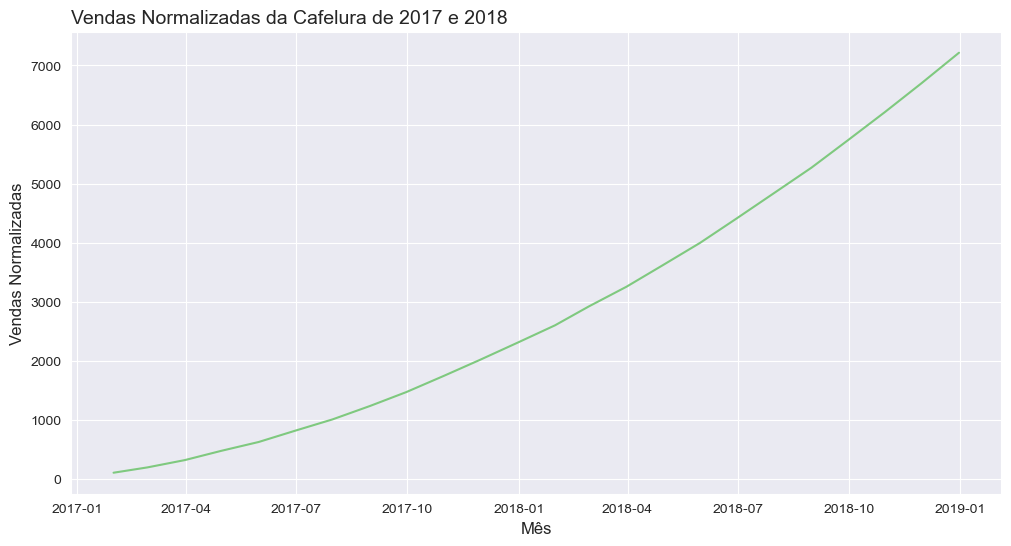

In [35]:
dia_fds = pd.read_csv('datasets/dias_final_de_semana.csv')

cafelura['vendas_normalizadas'] = cafelura['vendas'] / dia_fds['quantidade_de_dias'].values

plotar('Vendas Normalizadas da Cafelura de 2017 e 2018', 'Mês', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

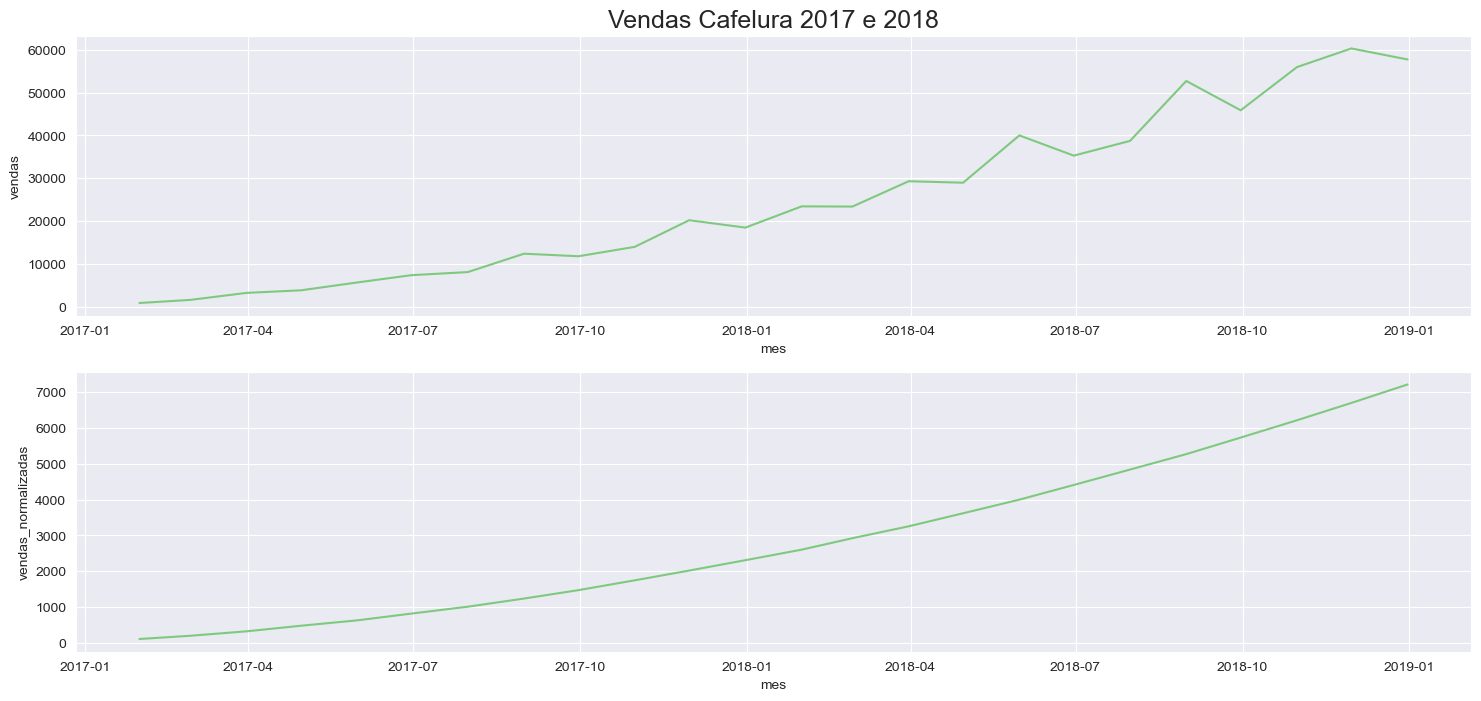

In [42]:
plt.figure(figsize= (18,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x='mes', y='vendas', data = cafelura)
plt.subplot(2,1,2)
##ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x='mes', y='vendas_normalizadas', data = cafelura)
ax = ax


C:\Users\mathe\AppData\Local\Temp/ipykernel_16108/2039852764.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  resultado = seasonal_decompose(chocolate['vendas'], freq = 3)


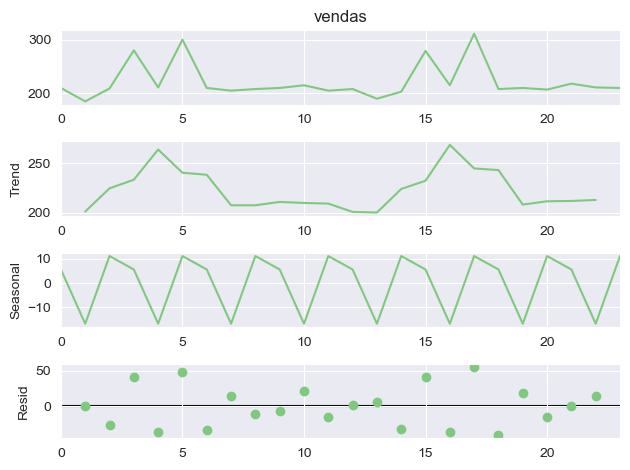

In [50]:
#Statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

resultado = seasonal_decompose(chocolate['vendas'], freq = 3)
ax = resultado.plot()

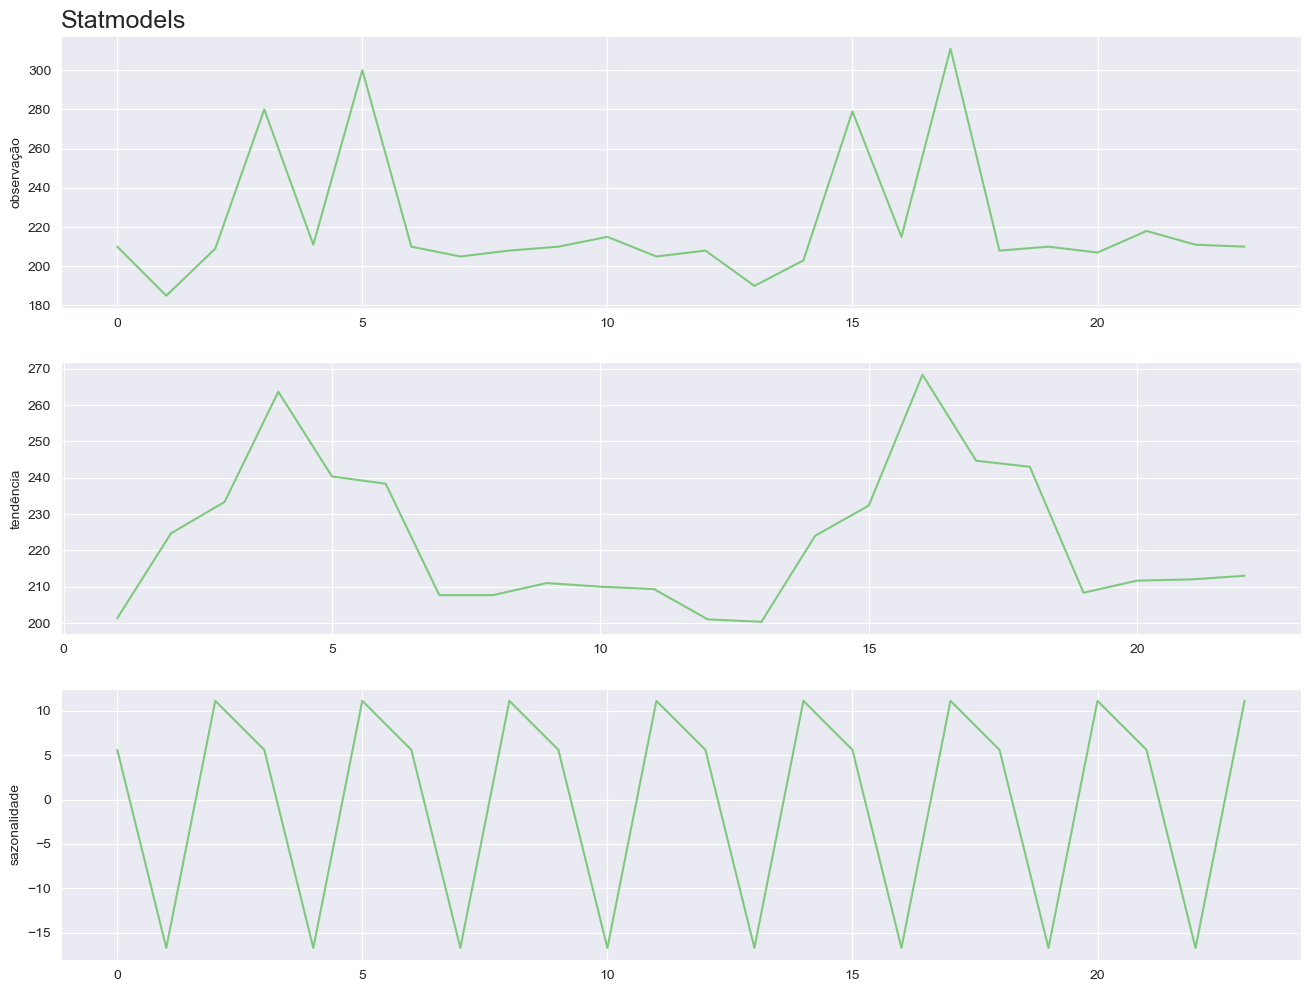

In [51]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

data = ({
    'observação' : observacao,
    'tendência' : tendencia,
    'sazonalidade' : sazonalidade,
    'ruído' : ruido
})

df_resultado = pd.DataFrame(data)

comparacao(df_resultado.index, 'observação', 'tendência', 'sazonalidade', df_resultado, 'Statmodels' )

In [25]:
# Quando o valor de uma determinada data é nulo podemos lidar das seguintes formas:

# 1 - Definindo valor como a média dos dados observados
# df.fillna(df['vendas'].mean(),inplace=True)

# 2 - Definindo valor como um número específico
# df.fillna(21,inplace=True)

# 3 - Removendo o valor nulo
# df.dropna(inplace=True)

# 4 - Preenchendo com o valor anterior ou posterior
# df.ffill().head() anterior
# df.bfill().head() posterior

# 5 - Interpolando o valor nulo com o valor médio (Média pegando o valor posterior e anterior da sequência)
# df.interpolate().head()

#